---
title: Supervised methods - Classification
teaching: 60
exercises: 0
---

:::::::::::::::::::::::::::::::::::::: questions 

- What is classification, and how does it differ from regression?
- How can we use Scikit-Learn to train and evaluate a classification model?
- Why and how do we split data into training and testing sets for classification?
- What are hyperparameters, and how do they affect model performance?
- When should I standardize my data, and when is it safe to skip this step?
  
::::::::::::::::::::::::::::::::::::::::::::::::

::::::::::::::::::::::::::::::::::::: objectives

- Define supervised classification and explain how it differs from (supervised) regression.
- Load and inspect the penguins dataset, selecting appropriate numeric features and labels.
- Create train/test splits for classification and explain why stratification and shuffling matter.
- Train and evaluate a decision tree classifier using Scikit-Learn.
- Describe what a hyperparameter is and explore how changing `max_depth` affects a decision tree.
- Visualize decision boundaries for a simple classifier to build intuition about how it separates classes.
- Standardize features and train an SVM classifier, comparing its performance to the decision tree.
- Explain which types of models benefit from feature scaling (standardization) and which generally do not.
- Recognize signs of overfitting in classification models and relate them to model complexity and data quality.

::::::::::::::::::::::::::::::::::::::::::::::::

# Classification

Classification is a supervised method to recognise and group data objects into a pre-determined categories. Where regression uses labelled observations to predict a continuous numerical value, classification predicts a discrete categorical fit to a class. Classification in ML leverages a wide range of algorithms to classify a set of data/datasets into their respective categories.

In this episode we are going to introduce the concept of supervised classification by classifying penguin data into different species of penguins using Scikit-Learn.

## The penguins dataset
We're going to be using the penguins dataset of Allison Horst, published [here](https://github.com/allisonhorst/palmerpenguins), The dataset contains 344 size measurements for three penguin species (Chinstrap, Gentoo and Adélie) observed on three islands in the Palmer Archipelago, Antarctica.

![*Artwork by @allison_horst*](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn-v2/main/episodes/fig/palmer_penguins.png)

The physical attributes measured are flipper length, beak length, beak width, body mass, and sex.
![*Artwork by @allison_horst*](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn-v2/main/episodes/fig/culmen_depth.png)

In other words, the dataset contains 344 rows with 7 features i.e. 5 physical attributes, species and the island where the observations were made.

In [1]:
import seaborn as sns

dataset = sns.load_dataset('penguins')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Our aim is to develop a classification model that will predict the species of a penguin based upon measurements of those variables.

As a rule of thumb for ML/DL modelling, it is best to start with a simple model and progressively add complexity in order to meet our desired classification performance.

For this lesson we will limit our dataset to only numerical values such as bill_length, bill_depth, flipper_length, and body_mass while we attempt to classify species.

The above table contains multiple categorical objects such as species. If we attempt to include the other categorical fields, island and sex, we might hinder classification performance due to the complexity of the data.

### Preprocessing our data

Lets do some pre-processing on our dataset and specify our `X` features and `y` labels:

In [2]:
# Extract the data we need
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)

class_names = dataset['species'].unique()

X = dataset[feature_names]
y = dataset['species']

Having extracted our features `X` and labels `y`, we can now split the data using the `train_test_split` function.

## Training-testing split
When undertaking any machine learning project, it's important to be able to evaluate how well your model works. 

Rather than evaluating this manually we can instead set aside some of our training data, usually 20% of our training data, and use these as a testing dataset. We then train on the remaining 80% and use the testing dataset to evaluate the accuracy of our trained model. 

We lose a bit of training data in the process, But we can now easily evaluate the performance of our model. With more advanced test-train split techniques we can even recover this lost training data!

::::::::::::::::::::::::::::::::::::: callout


## Why do we do this?
It's important to do this early, and to do all of your work with the training dataset - this avoids any risk of you introducing bias to the model based on your own manual observations of data in the testing set (afterall, we want the model to make the decisions about parameters!). This can also highlight when you are over-fitting on your training data.

::::::::::::::::::::::::::::::::::::::::::::::::

How we split the data into training and testing sets is also extremely important. We need to make sure that our training data is representitive of both our test data and actual data. 

For classification problems this means we should ensure that each class of interest is represented proportionately in both training and testing sets. For regression problems we should ensure that our training and test sets cover the range of feature values that we wish to predict.

In the previous regression episode we created the penguin training data by taking the first 146 samples our the dataset. Unfortunately the penguin data is sorted by species and so our training data only considered one type of penguin and thus was not representitive of the actual data we tried to fit. We could have avoided this issue by randomly shuffling our penguin samples before splitting the data.

::::::::::::::::::::::::::::::::::::: callout


## When not to shuffle your data
Sometimes your data is dependant on it's ordering, such as time-series data where past values influence future predictions. Creating train-test splits for this can be tricky at first glance, but fortunately there are existing techniques to tackle this (often called stratification): See [Scikit-Learn](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) for more information.

::::::::::::::::::::::::::::::::::::::::::::::::

 We specify the fraction of data to use as test data, and the function randomly shuffles our data prior to splitting:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We'll use `X_train` and `y_train` to develop our model, and only look at `X_test` and `y_test` when it's time to evaluate its performance.

### Visualising the data
In order to better understand how a model might classify this data, we can first take a look at the data visually, to see what patterns we might identify.

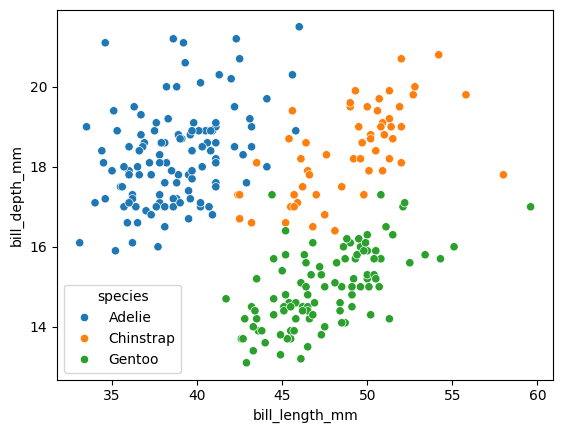

In [4]:
import matplotlib.pyplot as plt

fig01 = sns.scatterplot(X_train, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

As there are four measurements for each penguin, we need quite a few plots to visualise all four dimensions against each other. Here is a handy Seaborn function to do so:

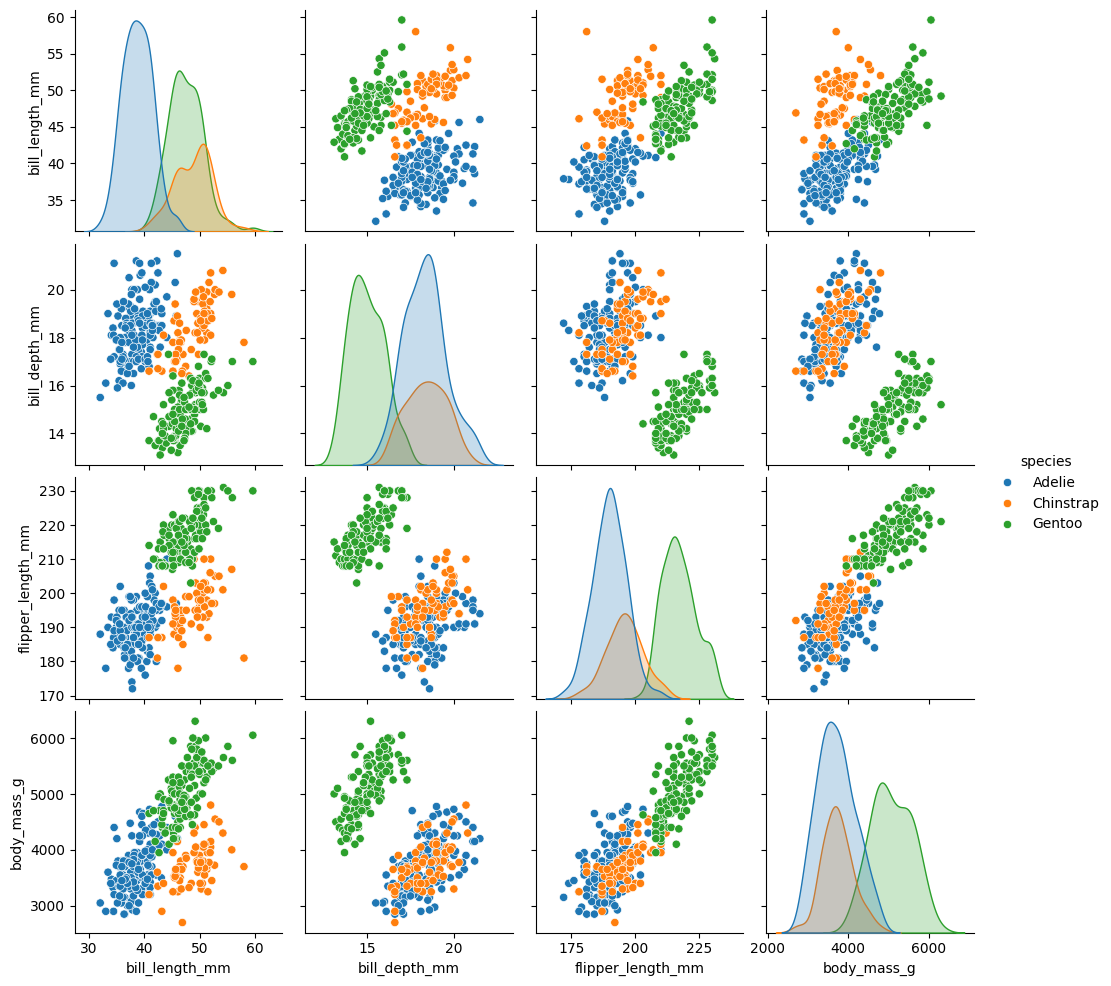

In [5]:
sns.pairplot(dataset, hue="species")
plt.show()

We can see that penguins from each species form fairly distinct spatial clusters in these plots, so that you could draw lines between those clusters to delineate each species. This is effectively what many classification algorithms do. They use the training data to delineate the observation space, in this case the 4 measurement dimensions, into classes. When given a new observation, the model finds which of those class areas the new observation falls in to.


## Classification using a decision tree
We'll first apply a decision tree classifier to the data. Decisions trees are conceptually similar to flow diagrams (or more precisely for the biologists: dichotomous keys). They split the classification problem into a binary tree of comparisons, at each step comparing a measurement to a value, and moving left or right down the tree until a classification is reached.

![Decision tree for classifying penguins](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn-v2/main/episodes/fig/decision_tree_example.png)


Training and using a decision tree in Scikit-Learn is straightforward:

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

clf.predict(X_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie'], dtype=object)

::::::::::::::::::::::::::::::::::::: callout


## Hyper-parameters: parameters that tune a model
'Max Depth' is an example of a *hyper-parameter* for the decision tree model. Where models use the parameters of an observation to predict a result, hyper-parameters are used to tune how a model works. Each model you encounter will have its own set of hyper-parameters, each of which affects model behaviour and performance in a different way. The process of adjusting hyper-parameters in order to improve model performance is called hyper-parameter tuning.

::::::::::::::::::::::::::::::::::::::::::::::::

We can conveniently check how our model did with the .score() function, which will make predictions and report what proportion of them were accurate:

In [7]:
clf_score = clf.score(X_test, y_test)
print(clf_score)

0.9855072463768116


Our model reports an accuracy of ~98% on the test data! We can also look at the decision tree that was generated:

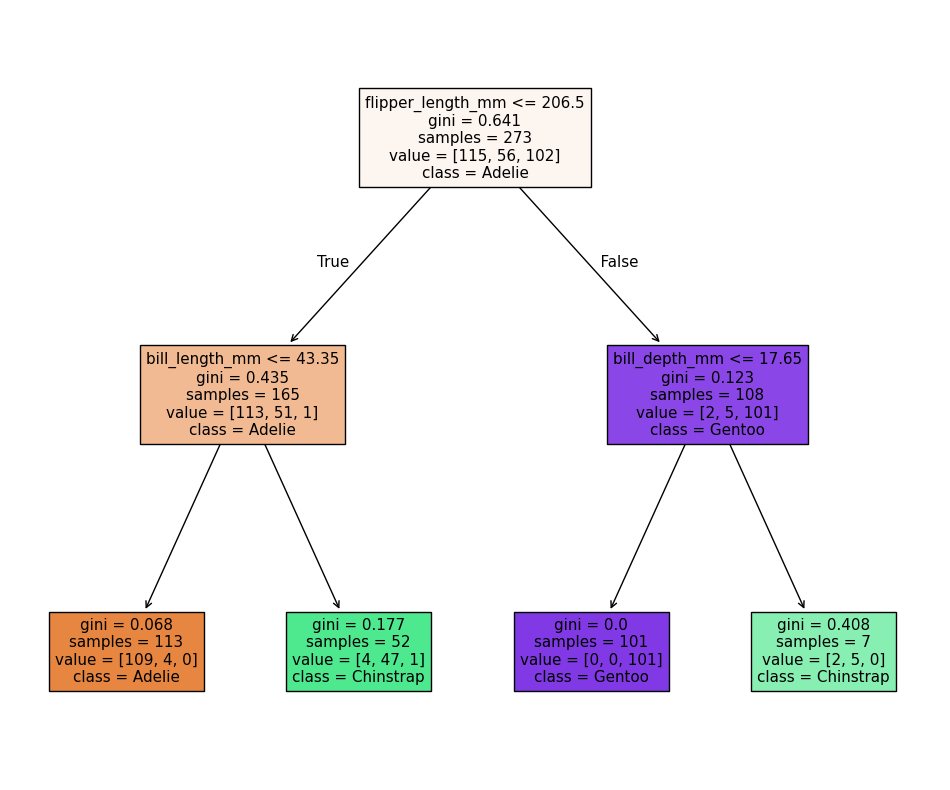

In [8]:
fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

The first first question (`depth=1`) splits the training data into "Adelie" and "Gentoo" categories using the criteria `flipper_length_mm <= 206.5`, and the next two questions (`depth=2`) split the "Adelie" and "Gentoo" categories into "Adelie & Chinstrap" and "Gentoo & Chinstrap" predictions. 



<!-- We can see from this that there's some very tortuous logic being used to tease out every single observation in the training set. For example, the single purple Gentoo node at the bottom of the tree. If we truncated that branch to the second level (Chinstrap), we'd have a little inaccuracy, a total of 9 non-Chinstraps in with 48 Chinstraps, but a less convoluted model.

The tortuous logic, such as the bottom purple Gentoo node, is a clear indication that this model has been over-fitted. It has developed a very complex delineation of the classification space in order to match every single observation, which will likely lead to poor results for new observations.

We can see that rather than clean lines between species, the decision tree produces orthogonal regions as each decision only considers a single parameter. Again, we can see that the model is over-fitting as the decision space is far more complex than needed, with regions that only select a single point. -->

### Visualising the classification space
We can visualise the classification space (decision tree boundaries) to get a more intuitive feel for what it is doing.Note that our 2D plot can only show two parameters at a time, so we will quickly visualise by training a new model on only 2 features:

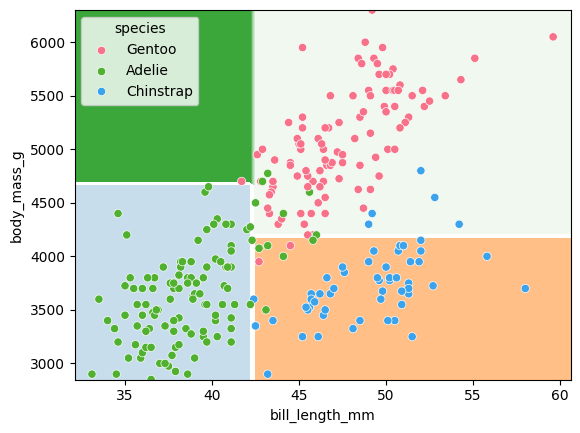

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")
plt.show()

## Tuning the `max_depth` hyperparameter

Our decision tree using a `max_depth=2` is fairly simple and there are still some incorrect predictions in our final classifications. Let's try varying the `max_depth` hyperparameter to see if we can improve our model predictions.

<!-- We can reduce the over-fitting of our decision tree model by limiting its depth, forcing it to use less decisions to produce a classification, and resulting in a simpler decision space. -->

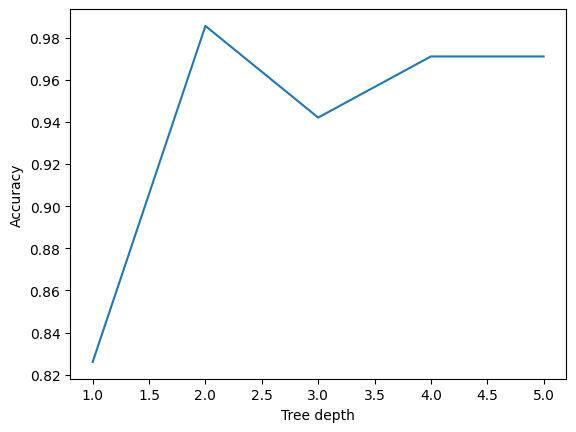

In [10]:
import pandas as pd

max_depths = [1, 2, 3, 4, 5]

accuracy = []
for i, d in enumerate(max_depths):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

sns.lineplot(acc_df, x='depth', y='accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

Here we can see that a `max_depth=2` performs slightly better on the test data than those with `max_depth > 2`. This can seem counter intuitive, as surely more questions should be able to better split up our categories and thus give better predictions?

Let's reuse our fitting and plotting codes from above to inspect a decision tree that has `max_depth=5`:

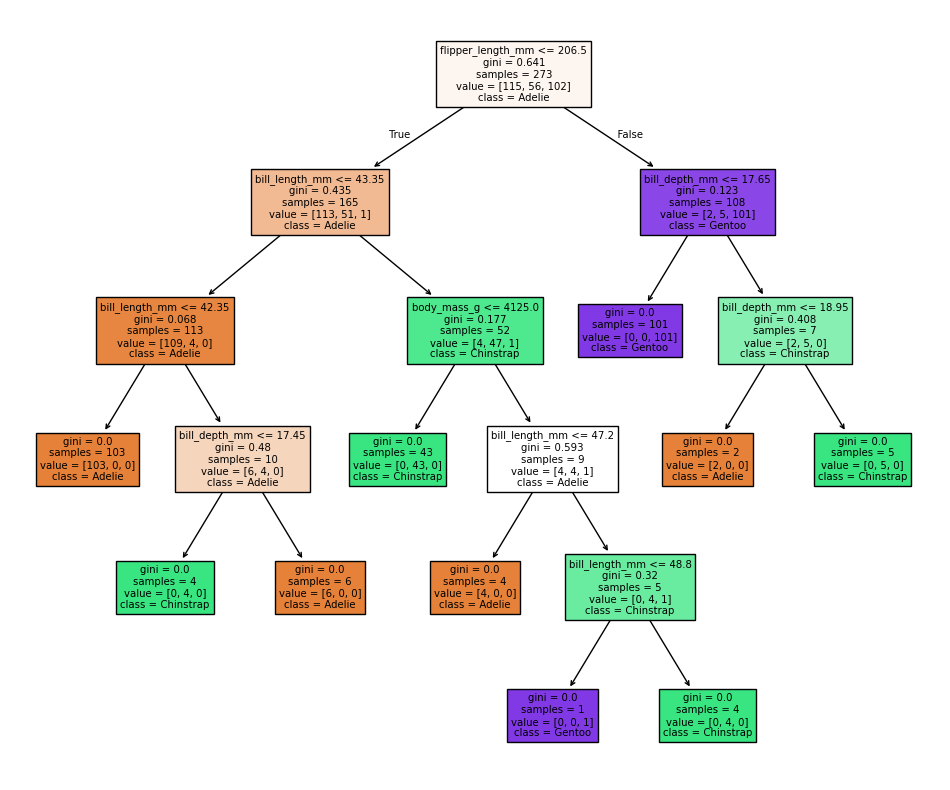

In [11]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

It looks like our decision tree has split up the training data into the correct penguin categories and more accurately than the `max_depth=2` model did, however it used some very specific questions to split up the penguins into the correct categories. Let's try visualising the classification space for a more intuitive understanding:

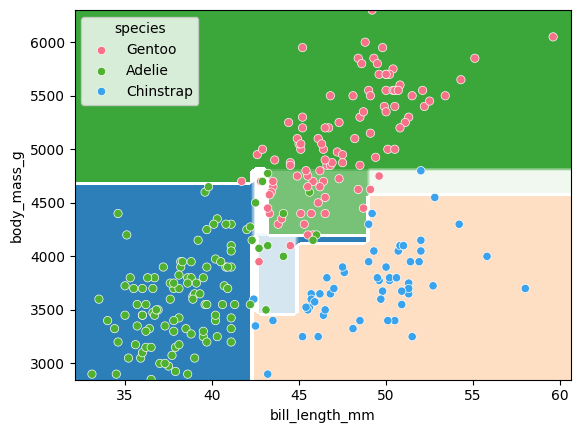

In [12]:
f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette='husl')
plt.show()

Earlier we saw that the `max_depth=2` model split the data into 3 simple bounding boxes, whereas for `max_depth=5` we see the model has created some very specific classification boundaries to correctly classify every point in the training data.

This is a classic case of over-fitting - our model has produced extremely specific parameters that work for the training data but are not representitive of our test data. Sometimes simplicity is better!

::::::::::::::::::::::::::::::::::::: challenge

## Exercise: Adding noise to the training data

We observed that this data doesn't seem prone to overfitting effects. Why might this be? There are at least two factors contributing to these results:

1. We only have 4 predictors. With so few predictors, there are only so many unique tree structures that can be tested/formed. This makes overfitting less likely.  
2. Our data is sourced from a Python library, and has been cleaned/vetted. Real-world data typically has more noise.

Let's try adding a small amount of noise to the data using the code below. How does this impact the ideal setting for the tree depth?

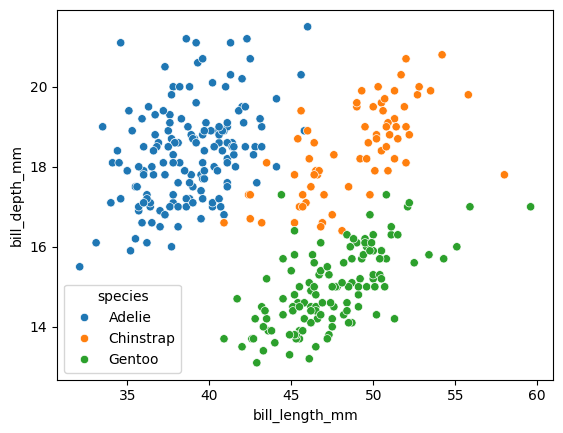

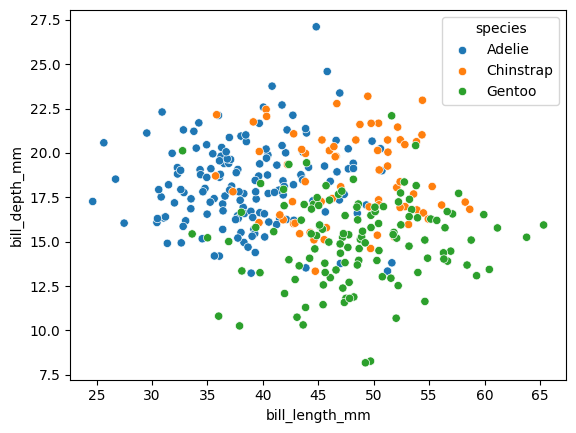

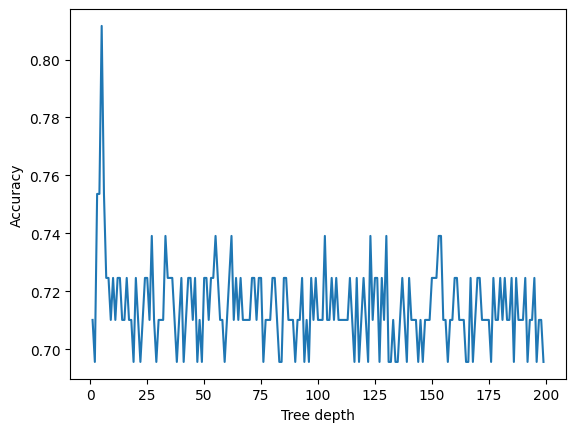

In [13]:
# 1) LOAD DATA (if not loaded already)
import seaborn as sns
dataset = sns.load_dataset("penguins")
dataset.head()

# 2) Extract the data we need and drop NaNs (if not done already)
feature_names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
dataset.dropna(subset=feature_names, inplace=True)
class_names = dataset["species"].unique()
X = dataset[feature_names]
y = dataset["species"]

# 3) ADD RANDOM NOISE TO X
import numpy as np

stds = X.std(axis=0).to_numpy()

# Generate noise and scale it
# Set seed for reproducibility
np.random.seed(42)
noise = np.random.normal(0, 1, X.shape)  # sample numbers from normal distribution
scaled_noise = noise * stds  # noise up to 1 standard deviation
X_noisy = X + scaled_noise

import matplotlib.pyplot as plt

fig01 = sns.scatterplot(X, x=feature_names[0], y=feature_names[1], hue=dataset["species"])
plt.show()
fig02 = sns.scatterplot(X_noisy, x=feature_names[0], y=feature_names[1], hue=dataset["species"])
plt.show()

# 4) TRAIN/TEST SPLIT
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=0, stratify=y
# )
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.2, random_state=0, stratify=y
)

# 5) HYPERPARAMETER TUNING
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

max_depths = list(range(1, 200))
accuracy = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=["depth", "accuracy"])

sns.lineplot(acc_df, x="depth", y="accuracy")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.show()

:::::::::::::::::::::::::::::::::::::

## Classification using support vector machines
Next, we'll look at another commonly used classification algorithm, and see how it compares. Support Vector Machines (SVM) work in a way that is conceptually similar to your own intuition when first looking at the data. They devise a set of hyperplanes that delineate the parameter space, such that each region contains ideally only observations from one class, and the boundaries fall between classes. One of the core strengths of Support Vector Machines (SVMs) is their ability to handle non-linear relationships between features by transforming the data into a higher-dimensional space. This transformation allows SVMs to find a linear boundary/hyperplane in this new space, which corresponds to a non-linear boundary in the original space.

**What are the "trainable parameters" in an SVM?** 
For a linear SVM, the trainable parameters are:

- Weight vector: A vector that defines the orientation of the hyperplane. Its size is equal to the number of features in X.
- Bias: A scalar value that shifts the hyperplane to maximize the margin.
  
### When to Choose SVM Over Decision Tree

1. **High-Dimensional Data**:
   - **Why SVM**: SVMs excel in high-dimensional spaces because the kernel trick allows them to separate classes even in complex feature spaces without explicitly mapping the data.
   - **Why Not Decision Tree**: Decision trees struggle with high-dimensional data as the number of potential splits grows exponentially, leading to overfitting or underperformance.

2. **Accuracy over Interpretbaility**:
   - **Why SVM**: SVMs are often considered black-box models, focusing on accuracy rather than interpretability.
   - **Why Not Decision Tree**: Decision trees are typically interpretable, making them better if you need to explain your model.


### Standardizing data
Unlike decision trees, SVMs require an additional pre-processing step for our data. We need to standardize or "z-score" it. Our raw data has parameters with different magnitudes such as bill length measured in 10's of mm's, whereas body mass is measured in 1000's of grams. If we trained an SVM directly on this data, it would only consider the parameter with the greatest variance (body mass). 

Standarizing maps each parameter to a new range so that it has a mean of 0 and a standard deviation of 1. This places all features on the same playing field, and allows SVM to reveal the most accurate decision boundaries.

#### When to Standardize Your Data: A Broader Overview

Standardization is an essential preprocessing step for many machine learning models, particularly those that rely on **distance-based calculations** to make predictions or extract features. These models are sensitive to the scale of the input features because their mathematical foundations involve distances, magnitudes, or directions in the feature space. Without standardization, features with larger ranges can dominate the calculations, leading to suboptimal results. However, not all models require standardization; some, like decision trees, operate on thresholds and are unaffected by feature scaling. Here's a breakdown of when to standardize, explicitly explaining the role of distance-based calculations in each case.
  
##### When to Standardize: Models That Use Distance-Based Calculations

1. **Support Vector Machines (SVMs)**: SVMs calculate the distance of data points to a hyperplane and aim to maximize the margin (the distance between the hyperplane and the nearest points, called support vectors).

2. **k-Nearest Neighbors (k-NN)**: k-NN determines class or value predictions based on the distance between a query point and its k-nearest neighbors in the feature space.

3. **Logistic Regression with Regularization**: Regularization terms (e.g., L1 or L2 penalties) involve calculating the magnitude (distance) of the parameter vector to reduce overfitting and encourage simplicity.

4. **Principal Component Analysis (PCA)**: PCA identifies principal components by calculating the Euclidean distance from data points to the axes representing the highest variance directions in the feature space.

5. **Neural Networks (NNs)**: Neural networks rely on gradient-based optimization to learn weights. If input features have vastly different scales, gradients can become unstable, slowing down training or causing convergence issues. Standardizing or normalizing (scaling from 0 to 1) features ensures that all inputs contribute equally to the optimization process.

6. **Linear Regression (for Interpreting Many Coefficients)**: While linear regression itself doesn’t rely on distance-based calculations, standardization is crucial when interpreting coefficients because it ensures that all features are on the same scale, making their relative importance directly comparable. Without standardization, coefficients in linear regression reflect the relationship between the dependent variable and a feature in the units of that feature, making it difficult to compare features with different scales (e.g., height in centimeters vs. weight in kilograms).

##### When to Skip Standardization: Models That Don’t Use Distance-Based Calculations

1. **Decision Trees**: Decision trees split data based on thresholds, independent of feature scales, without relying on any distance-based calculations.

2. **Random Forests**: Random forests aggregate decisions from multiple trees, which also use thresholds rather than distance-based metrics.

3. **Gradient Boosted Trees**: Gradient boosting optimizes decision trees sequentially, focusing on residuals and splits rather than distance measures.

By understanding whether a model relies on distance-based calculations (or benefits from standardized features for interpretability), you can decide whether standardization is necessary, ensuring that your preprocessing pipeline is well-suited to the algorithm you’re using.

In [14]:
# Extract clean set of data
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)

class_names = dataset['species'].unique()
X = dataset[feature_names]
y = dataset['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn import preprocessing
import pandas as pd

scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train_scaled = pd.DataFrame(scalar.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns, index=X_test.index)

Note that we fit the scalar to our training data - we then use this same pre-trained scalar to transform our testing data.

With this scaled data, training the models works exactly the same as before.

In [16]:
from sklearn import svm

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(X_train_scaled, y_train)

svm_score = SVM.score(X_test_scaled, y_test)
print("Decision tree score is ", clf_score)
print("SVM score is ", svm_score)

Decision tree score is  0.9855072463768116
SVM score is  0.9565217391304348


We can again visualise the decision space produced, also using only two parameters:

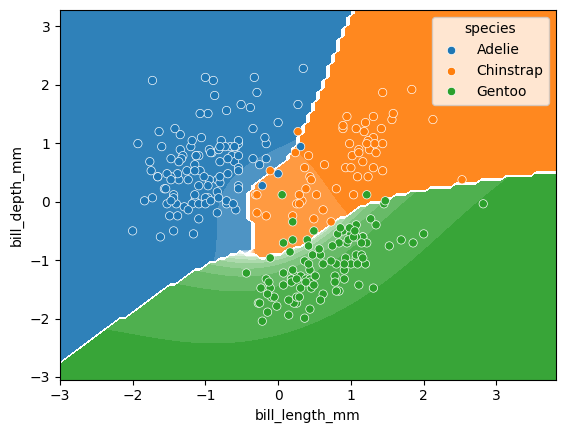

In [17]:
x2 = X_train_scaled[[feature_names[0], feature_names[1]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x2, y_train)

DecisionBoundaryDisplay.from_estimator(SVM, x2) #, ax=ax
sns.scatterplot(x2, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

**SVM parameters**: 

- **`kernel`**: Specifies how the SVM transforms the data to find patterns; start with `'rbf'` for most cases, `'linear'` for high-dimensional data, or `'poly'` for polynomial relationships.
  - Linear Kernel: Directly computes the dot product between input vectors; best for linearly separable data and high-dimensional spaces, offering simplicity and efficiency.
  - Poly Kernel: Computes polynomial relationships of features, allowing for flexible decision boundaries; ideal for data with polynomial patterns.
  - RBF (Radial Basis Function) Kernel: Uses a Gaussian function to create highly flexible decision boundaries; effective for non-linear, complex data. 
- **`degree`**: Sets the complexity of the polynomial kernel; use `degree=3` for cubic relationships, and avoid going higher unless you have lots of data.
- **`C`**: Balances smoothness of the decision boundary and misclassifications; start with `C=1`, increase for tighter boundaries, decrease to prevent overfitting.




While this SVM model performs slightly worse than our decision tree (95.6% vs. 98.5%), it's likely that the non-linear boundaries will perform better when exposed to more and more real data, as decision trees are prone to overfitting and requires complex linear models to reproduce simple non-linear boundaries. It's important to pick a model that is appropriate for your problem and data trends!

::::::::::::::::::::::::::::::::::::: keypoints 

- Classification is a supervised learning task where the goal is to predict discrete class labels from labeled examples.
- Train/test splits let us estimate how well a classifier will generalize to unseen data; for classification, stratifying by class is often important.
- Decision trees are easy to train and interpret, but can overfit when depth and other hyperparameters are not controlled.
- Hyperparameters (such as `max_depth`) control model complexity and behavior but are not learned directly from the data.
- Models that rely on distances or geometric margins in feature space (such as SVMs) usually require standardized inputs; tree-based models typically do not.
- Comparing different classifiers (for example, decision trees vs SVMs) on the same train/test split helps reveal tradeoffs between accuracy, robustness, and interpretability.

::::::::::::::::::::::::::::::::::::::::::::::::